In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

ci_df = pd.read_csv('FINAL SE DATA.csv')

print("First 5 rows Below : ")
print(ci_df.head())
print("\n Description Below : ")
print(ci_df.describe())
print("\n CI Projects - Numeric Columns with NaN values:")
print(ci_df.select_dtypes(include=['number']).isna().sum())
print("\n CI Projects - Numeric Columns Variance:")
print(ci_df.select_dtypes(include=['number']).var())
print("\n CI Projects Data Types:")
print(ci_df.dtypes)


First 5 rows Below : 
                        repo_name  stars  issues  open_prs  closed_prs  \
0                   alibaba/nacos  30811     242        13        4134   
1                   alibaba/canal  28794    1156        62         635   
2  OpenAPITools/openapi-generator  22745    5122       516       11242   
3             pockethub/PocketHub   9386     127         2         628   
4          java-native-access/jna   8616     107        14         830   

   total_prs language  is_fork  \
0       4147     Java    False   
1        697     Java    False   
2      11758     Java    False   
3        630     Java    False   
4        844     Java    False   

                                                 url  size_mb  uses_travis  \
0                   https://github.com/alibaba/nacos    59.37         True   
1                   https://github.com/alibaba/canal    23.52         True   
2  https://github.com/OpenAPITools/openapi-generator   881.42         True   
3             ht

0         inf
1    0.020463
2    0.210832
3    0.011754
4    0.011236
Name: BeforeCI_Ratio, dtype: float64
0    0.008903
1    0.041367
2    0.010970
3    0.018051
4    0.018080
Name: AfterCI_Ratio, dtype: float64


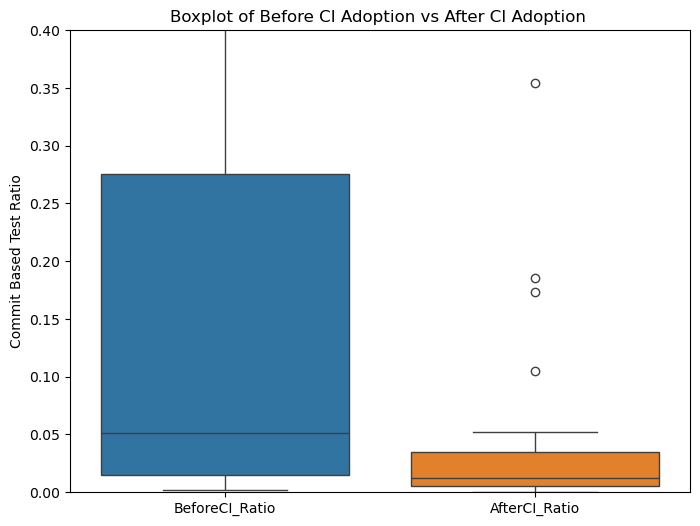

In [2]:
#Calculating and Plotiing Commit Based Test Code Ratio 
ci_df['BeforeCI_Ratio'] = ci_df['test_LOC'] / ci_df['commits_before_CI']
print(ci_df['BeforeCI_Ratio'].head())
ci_df['AfterCI_Ratio'] = ci_df['test_LOC'] / ci_df['commits_after_CI']
print(ci_df['AfterCI_Ratio'].head())
plt.figure(figsize=(8, 6))
sns.boxplot(data=ci_df[['BeforeCI_Ratio', 'AfterCI_Ratio']])  
plt.title('Boxplot of Before CI Adoption vs After CI Adoption ')
plt.ylim(0.0, 0.4)
plt.ylabel('Commit Based Test Ratio')
plt.show()

In [3]:
#Calculating Code Coverage Percentage 
ci_df['Code_Coverage'] = ci_df['test_LOC'] / ci_df['total_LOC'] 
mean_value = ci_df['Code_Coverage'].mean()
print("Average Code Coverage Percentage is ",mean_value*100)

Average Code Coverage Percentage is  0.1025049241217113


In [12]:
#Perfroming Shapiro and Paired T-Test 
stat, p_value = stats.shapiro(ci_df['BeforeCI_Ratio'] - ci_df['AfterCI_Ratio'])
print(f"Shapiro Test p-value: {p_value}")
t_stat, p_val = stats.ttest_rel(ci_df['BeforeCI_Ratio'], ci_df['AfterCI_Ratio'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Statistically significant difference between Before and After CI test ratios.")
else:
    print("No significant difference between Before and After CI test ratios.")


Shapiro Test p-value: nan
T-statistic: nan
P-value: nan
No significant difference between Before and After CI test ratios.


In [14]:
#Performing Wilcoxon Signed-Rank Test.
w_stat, p_val = stats.wilcoxon(ci_df['BeforeCI_Ratio'], ci_df['AfterCI_Ratio'])
print(f"Wilcoxon Test Statistic: {w_stat}")
print(f"Wilcoxon P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Statistically significant difference between Before and After CI test ratios.")
else:
    print("No significant difference between Before and After CI test ratios.")

Wilcoxon Test Statistic: nan
Wilcoxon P-value: nan
No significant difference between Before and After CI test ratios.
